In [1]:
import spike.spike_analysis.spike_collection as sc
import spike.spike_analysis.spike_recording as sr
import spike.spike_analysis.firing_rate_calculations as fr
import spike.spike_analysis.normalization as norm
import spike.spike_analysis.single_cell as single_cell
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import behavior.boris_extraction as boris
import matplotlib.pyplot as plt
import behavior.behavioral_epoch_tools as bet
from scipy import stats
from statsmodels.stats.multitest import multipletests

In [2]:
def random_event_generator(start, stop, len_event, no_events):
    total_duration = stop - start
    possible_events = np.arange(int(total_duration / len_event))
    pot_events = np.random.choice(possible_events, size = (no_events), replace = False)
    pot_events = np.sort(pot_events)
    events = []
    for i in pot_events: 
        event_start = (start + (len_event * i)) * 1000
        event_stop = (event_start + (len_event * 1000))
        events.append(np.array([event_start, event_stop]))
    return(np.array(events))

In [3]:
# bar plots of anogenital vs facial sniffing:
# total duration, event length, and number of events, 
# for (exp1 + exp5 combined) vs (exp3 + exp4 combined) for novel condition

behavior_dfs = {}
path = r"C:\Users\zhaoz\Desktop\Research\data\aggregated_csvs"
for file in os.listdir(path):
	if file.endswith(".csv"):
		behavior_dfs[file] = pd.read_csv(os.path.join(path, file))

behavior_dicts = {}
min_bout = 0.3
min_iti = 0.5
subject = ['subject']
behavior = ['anogenital sniffing', 'facial sniffing', 'sniffing object']
order_dict = {'T': 'novel object', 'B': 'familiar object', 'N': 'novel mouse', 'C': 'familiar mouse'}

for filename, df in behavior_dfs.items():
    print(filename)
    mouse_in = list(df[df['Behavior'] == 'mice back in']['Start (s)'])
    mouse_out = list(df[df['Behavior'] == 'mice taken out']['Start (s)'])
    if filename == '23_object_TBCN.csv':
        mouse_in.insert(0, 602)
        mouse_out.insert(0, 900)
        mouse_in.insert(1, 902)
        mouse_out.insert(1, 1201)
    if filename == '32_object_NBTC.csv': 
        mouse_in.insert(1, 922)
        mouse_in.insert(2, 1222)
        mouse_out.insert(1, 1222)
        mouse_out.insert(2,1521)
    if filename == '31_object_BNTC.csv':
        mouse_in.insert(0, 608)
        mouse_in.insert(2, 1213)
        mouse_out.insert(0, 906)
        mouse_out.insert(2,1521)
    df_1 = df[df['Start (s)'] < mouse_out[0]]
    df_2 = df[(df['Start (s)'] > mouse_in[1]) &
            (df['Start (s)'] < mouse_out[1])]
    df_3 = df[(df['Start (s)'] > mouse_in[2]) &
            (df['Start (s)'] < mouse_out[2])]
    df_4 = df[(df['Start (s)'] > mouse_in[3])]
    arrays = []
    arrays.append(boris.get_behavior_bouts(df_1,
                                    subject = subject,
                                    behavior = behavior,
                                    min_bout = min_bout,
                                    min_iti = min_iti))
    arrays.append(boris.get_behavior_bouts(df_2,
                                    subject = subject,
                                    behavior = behavior,
                                    min_bout = min_bout,
                                    min_iti = min_iti))
    arrays.append(boris.get_behavior_bouts(df_3,    
                                    subject = subject,
                                    behavior = behavior,
                                    min_bout = min_bout,
                                    min_iti = min_iti))
    arrays.append(boris.get_behavior_bouts(df_4,        
                                    subject = subject,
                                    behavior = behavior,
                                    min_bout = min_bout,
                                    min_iti = min_iti))
    baseline_array = random_event_generator(0, mouse_in[0], 1, 12)                             
    order = filename.split("_")[-1].split(".")[0]
    behavior_dict = {}
    for i in range(len(order)):
        behavior_dict[f'{order_dict[order[i]]}'] = arrays[i]*1000
    behavior_dict['baseline'] = baseline_array
    behavior_dicts[filename] = behavior_dict

print(behavior_dicts)

22_object_CTBN.csv
23_object_TBCN.csv
31_object_BNTC.csv
32_object_NBTC.csv
41_object_BCNT.csv
44_object_TCNB.csv
{'22_object_CTBN.csv': {'familiar mouse': array([[605400., 606399.],
       [607600., 608866.],
       [609667., 610932.],
       [611867., 612600.],
       [614133., 615067.],
       [616267., 616933.],
       [628200., 632733.],
       [642467., 645066.],
       [677867., 680533.],
       [693933., 696467.],
       [816400., 818267.],
       [877533., 878732.],
       [883200., 885400.],
       [886400., 886867.],
       [904133., 904600.]]), 'novel object': array([[ 921133.,  921933.],
       [ 923067.,  925267.],
       [ 927933.,  929799.],
       [ 933067.,  934000.],
       [ 941867.,  943400.],
       [ 945267.,  947667.],
       [ 959867.,  961400.],
       [ 965200.,  967800.],
       [ 982600.,  983867.],
       [ 992867.,  993533.],
       [1001600., 1002200.],
       [1016333., 1017400.],
       [1034133., 1034733.],
       [1046400., 1048333.],
       [1071933

In [4]:
anogenital_sniffing_dicts = {}
facial_sniffing_dicts = {}
min_bout = 0.3
min_iti = 0.5
subject = ['subject']
order_dict = {'T': 'novel object', 'B': 'familiar object', 'N': 'novel mouse', 'C': 'familiar mouse'}

for filename, df in behavior_dfs.items():
	print(filename)
	mouse_in = list(df[df['Behavior'] == 'mice back in']['Start (s)'])
	mouse_out = list(df[df['Behavior'] == 'mice taken out']['Start (s)'])
	if filename == '23_object_TBCN.csv':
		mouse_in.insert(0, 602)
		mouse_out.insert(0, 900)
		mouse_in.insert(1, 902)
		mouse_out.insert(1, 1201)
	if filename == '32_object_NBTC.csv': 
		mouse_in.insert(1, 922)
		mouse_in.insert(2, 1222)
		mouse_out.insert(1, 1222)
		mouse_out.insert(2,1521)
	if filename == '31_object_BNTC.csv':
		mouse_in.insert(0, 608)
		mouse_in.insert(2, 1213)
		mouse_out.insert(0, 906)
		mouse_out.insert(2,1521)
	df_1 = df[df['Start (s)'] < mouse_out[0]]
	df_2 = df[(df['Start (s)'] > mouse_in[1]) &
            (df['Start (s)'] < mouse_out[1])]
	df_3 = df[(df['Start (s)'] > mouse_in[2]) &
            (df['Start (s)'] < mouse_out[2])]
	df_4 = df[(df['Start (s)'] > mouse_in[3])]
	# anogenital sniffing
	anogenital_sniffing_arrays = []
	anogenital_sniffing_arrays.append(boris.get_behavior_bouts(df_1,
                                    subject = subject,
                                    behavior = ['anogenital sniffing'],
                                    min_bout = min_bout,
                                    min_iti = min_iti))
	anogenital_sniffing_arrays.append(boris.get_behavior_bouts(df_2,
                                    subject = subject,
                                    behavior = ['anogenital sniffing'],
                                    min_bout = min_bout,
                                    min_iti = min_iti))
	anogenital_sniffing_arrays.append(boris.get_behavior_bouts(df_3,    
                                    subject = subject,
                                    behavior = ['anogenital sniffing'],
                                    min_bout = min_bout,
                                    min_iti = min_iti))
	anogenital_sniffing_arrays.append(boris.get_behavior_bouts(df_4,        
                                    subject = subject,
                                    behavior = ['anogenital sniffing'],
                                    min_bout = min_bout,
                                    min_iti = min_iti))
	# facial sniffing
	facial_sniffing_arrays = []
	facial_sniffing_arrays.append(boris.get_behavior_bouts(df_1,
                                    subject = subject,
                                    behavior = ['facial sniffing'],
                                    min_bout = min_bout,
                                    min_iti = min_iti))
	facial_sniffing_arrays.append(boris.get_behavior_bouts(df_2,
                                    subject = subject,
                                    behavior = ['facial sniffing'],
                                    min_bout = min_bout,
                                    min_iti = min_iti))
	facial_sniffing_arrays.append(boris.get_behavior_bouts(df_3,    
                                    subject = subject,
                                    behavior = ['facial sniffing'],
                                    min_bout = min_bout,
                                    min_iti = min_iti))
	facial_sniffing_arrays.append(boris.get_behavior_bouts(df_4,        
                                    subject = subject,
                                    behavior = ['facial sniffing'],
                                    min_bout = min_bout,
                                    min_iti = min_iti))
	baseline_array = random_event_generator(0, mouse_in[0], 1, 12)
	order = filename.split("_")[-1].split(".")[0]
	behavior_dict = {}
	for i in range(len(order)):
		behavior_dict[f'{order_dict[order[i]]}'] = {'anogenital sniffing': anogenital_sniffing_arrays[i]*1000,
													'facial sniffing': facial_sniffing_arrays[i]*1000}
	behavior_dict['baseline'] = baseline_array
	behavior_dicts[filename] = behavior_dict

print(behavior_dicts)
#for value in behavior_dicts.values():
#	print(value['familiar mouse'])
#	print(value['novel mouse'])

22_object_CTBN.csv
23_object_TBCN.csv
31_object_BNTC.csv
32_object_NBTC.csv
41_object_BCNT.csv
44_object_TCNB.csv
{'22_object_CTBN.csv': {'familiar mouse': {'anogenital sniffing': array([[605400., 606399.],
       [607600., 608866.],
       [609667., 610932.],
       [611867., 612600.],
       [614133., 614532.],
       [616267., 616933.],
       [630933., 632733.],
       [643933., 645066.],
       [678400., 680533.],
       [696000., 696467.],
       [816400., 818267.],
       [884133., 885400.],
       [886400., 886867.],
       [904133., 904600.]]), 'facial sniffing': array([[614533., 615067.],
       [628200., 630932.],
       [642467., 643932.],
       [677867., 678399.],
       [693933., 695999.],
       [877533., 878732.],
       [883200., 884132.]])}, 'novel object': {'anogenital sniffing': array([], shape=(0, 2), dtype=float64), 'facial sniffing': array([], shape=(0, 2), dtype=float64)}, 'familiar object': {'anogenital sniffing': array([], shape=(0, 2), dtype=float64), 'facia

In [5]:
conditions = ['familiar mouse', 'novel mouse']
behaviors = ['anogenital sniffing', 'facial sniffing']
total_duration = {}
aver_event_length = {}
n_o_events = {}

fam_ano_event_length = []
fam_fac_event_length = []
nov_ano_event_length = []
nov_fac_event_length = []

fam_ano_sniff_total_time = 0
nov_ano_sniff_total_time = 0

fam_fac_sniff_total_time = 0
nov_fac_sniff_total_time = 0

fam_ano_sniff_n_o_events = 0
nov_ano_sniff_n_o_events = 0

fam_fac_sniff_n_o_events = 0
nov_fac_sniff_n_o_events = 0
for recording, behavior_dict in behavior_dicts.items():
	#print(recording)
	#print(behavior_dict[conditions[0]][behaviors[0]].shape)
	for event in behavior_dict[conditions[0]][behaviors[0]]:
		fam_ano_sniff_total_time += (event[1] - event[0])/1000
		fam_ano_event_length.append((event[1] - event[0])/1000)
		fam_ano_sniff_n_o_events += 1
	
	for event in behavior_dict[conditions[1]][behaviors[0]]:
		nov_ano_sniff_total_time += (event[1] - event[0])/1000
		nov_ano_event_length.append((event[1] - event[0])/1000)
		nov_ano_sniff_n_o_events += 1

	for event in behavior_dict[conditions[0]][behaviors[1]]:
		fam_fac_sniff_total_time += (event[1] - event[0])/1000
		fam_fac_event_length.append((event[1] - event[0])/1000)
		fam_fac_sniff_n_o_events += 1

	for event in behavior_dict[conditions[1]][behaviors[1]]:
		nov_fac_sniff_total_time += (event[1] - event[0])/1000
		nov_fac_event_length.append((event[1] - event[0])/1000)
		nov_fac_sniff_n_o_events += 1

fam_aver_ano_time = fam_ano_sniff_total_time/fam_ano_sniff_n_o_events
fam_aver_fac_time = fam_fac_sniff_total_time/fam_fac_sniff_n_o_events
nov_aver_ano_time = nov_ano_sniff_total_time/nov_ano_sniff_n_o_events
nov_aver_fac_time = nov_fac_sniff_total_time/nov_fac_sniff_n_o_events

total_duration[behaviors[0]] = (fam_ano_sniff_total_time, nov_ano_sniff_total_time)
total_duration[behaviors[1]] = (fam_fac_sniff_total_time, nov_fac_sniff_total_time)
aver_event_length[behaviors[0]] = (fam_aver_ano_time, nov_aver_ano_time)
aver_event_length[behaviors[1]] = (nov_aver_fac_time, nov_aver_fac_time)
n_o_events[behaviors[0]] = (fam_ano_sniff_n_o_events, nov_ano_sniff_n_o_events)
n_o_events[behaviors[1]] = (fam_fac_sniff_n_o_events, nov_fac_sniff_n_o_events)

print(f"fam_ano_sniff_total_time: {fam_ano_sniff_total_time}")
print(f"nov_ano_sniff_total_time: {nov_ano_sniff_total_time}")
print(f"fam_fac_sniff_total_time: {fam_fac_sniff_total_time}")
print(f"nov_fac_sniff_total_time: {nov_fac_sniff_total_time}")
print(f"fam_ano_sniff_n_o_events: {fam_ano_sniff_n_o_events}")
print(f"nov_ano_sniff_n_o_events: {nov_ano_sniff_n_o_events}")
print(f"fam_fac_sniff_n_o_events: {fam_fac_sniff_n_o_events}")
print(f"nov_fac_sniff_n_o_events: {nov_fac_sniff_n_o_events}")
print(f"fam_aver_ano_time: {fam_aver_ano_time}")
print(f"fam_aver_fac_time: {fam_aver_fac_time}")
print(f"nov_aver_ano_time: {nov_aver_ano_time}")
print(f"nov_aver_fac_time: {nov_aver_fac_time}")

'''
for name, d in [
    ("Total duration", total_duration),
    ("Average length", aver_event_length),
    ("Event counts", n_o_events)
]:
    print(f"\n{name}:")
    for beh, tpl in d.items():
        print(f"  {beh}: {tpl}")
'''


fam_ano_sniff_total_time: 181.23199999999997
nov_ano_sniff_total_time: 140.18900000000002
fam_fac_sniff_total_time: 52.06699999999989
nov_fac_sniff_total_time: 110.156
fam_ano_sniff_n_o_events: 53
nov_ano_sniff_n_o_events: 89
fam_fac_sniff_n_o_events: 29
nov_fac_sniff_n_o_events: 67
fam_aver_ano_time: 3.419471698113207
fam_aver_fac_time: 1.7954137931034444
nov_aver_ano_time: 1.5751573033707869
nov_aver_fac_time: 1.6441194029850748


'\nfor name, d in [\n    ("Total duration", total_duration),\n    ("Average length", aver_event_length),\n    ("Event counts", n_o_events)\n]:\n    print(f"\n{name}:")\n    for beh, tpl in d.items():\n        print(f"  {beh}: {tpl}")\n'

In [1]:
def plot_ano_vs_fac(data, ylabel, title):
	x = np.arange(len(conditions))
	width = 0.35
	multiplier = 0

	fig, ax = plt.subplots(layout = 'constrained')

	for condition, measurement in data.items():
		offset = width*multiplier
		rects = ax.bar(x + offset, measurement, width, label = condition)
		ax.bar_label(rects, padding = 3)
		multiplier += 1

	ax.set_ylabel(ylabel)
	ax.set_title(title)
	ax.set_xticks(x + width/2, conditions)
	ax.legend()
	plt.show()

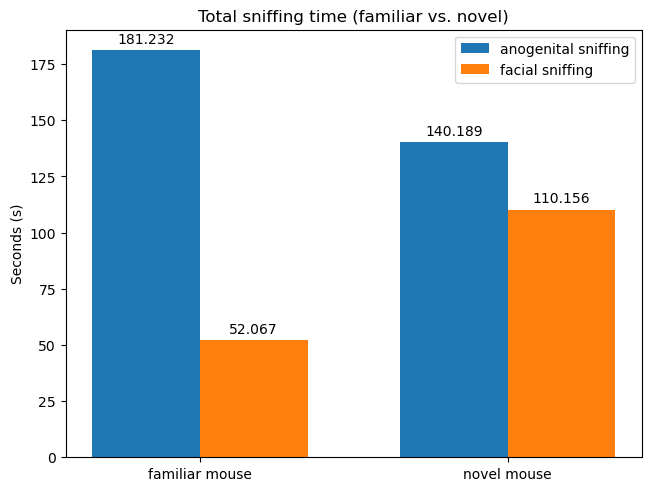

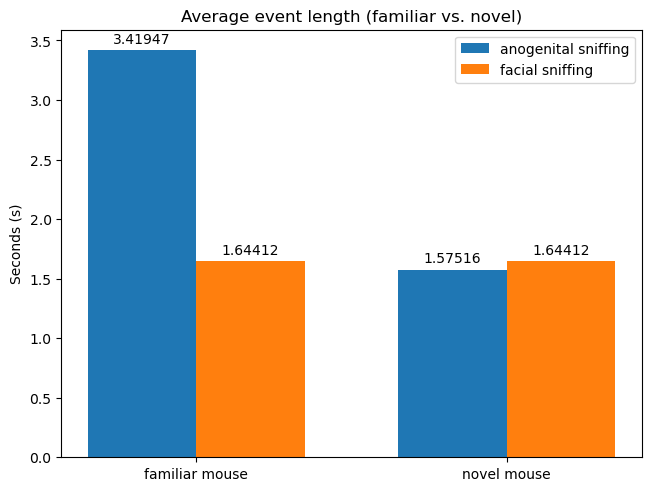

Anogenital sniffing vs. Facial sniffing for familier mouse:
t-statistic: 2.0301
Raw p-value: 0.0463


Anogenital sniffing vs. Facial sniffing for novel mouse:
t-statistic: -0.2432
Raw p-value: 0.8082


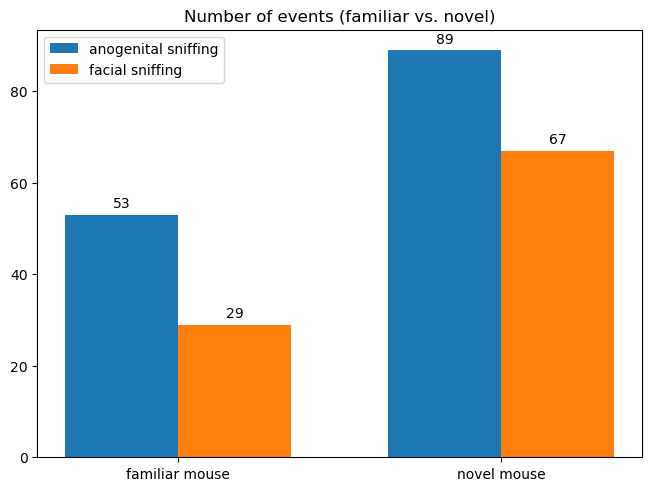

In [7]:
plot_ano_vs_fac(total_duration, 'Seconds (s)', 'Total sniffing time (familiar vs. novel)')

plot_ano_vs_fac(aver_event_length, 'Seconds (s)', 'Average event length (familiar vs. novel)')

fam_t_stat, fam_p_val = stats.ttest_ind(fam_ano_event_length, fam_fac_event_length, equal_var = False)
nov_t_stat, nov_p_val = stats.ttest_ind(nov_ano_event_length, nov_fac_event_length, equal_var = False)
print(f"Anogenital sniffing vs. Facial sniffing for familier mouse:")
print(f"t-statistic: {fam_t_stat:.4f}")
print(f"Raw p-value: {fam_p_val:.4f}")
print('\n')
print(f"Anogenital sniffing vs. Facial sniffing for novel mouse:")
print(f"t-statistic: {nov_t_stat:.4f}")
print(f"Raw p-value: {nov_p_val:.4f}")

'''
rejected, p_corrected, _, _ = multipletests([fam_p_val, nov_p_val], method='holm')

print(f"Anogenital sniffing vs. Facial sniffing for familier mouse:")
print(f"t-statistic: {fam_t_stat:.4f}")
print(f"Raw p-value: {fam_p_val:.4f}")
print(f"Corrected p-value: {p_corrected[0]:.4f}")
print(f"Significant: {rejected[0]}")
print('\n')
print(f"Anogenital sniffing vs. Facial sniffing for novel mouse:")
print(f"t-statistic: {nov_t_stat:.4f}")
print(f"Raw p-value: {nov_p_val:.4f}")
print(f"Corrected p-value: {p_corrected[1]:.4f}")
print(f"Significant: {rejected[1]}")
'''

plot_ano_vs_fac(n_o_events, '', 'Number of events (familiar vs. novel)')

In [ ]:
# subject only vs. social agent only vs. reciprocal
